In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
doc_train=pd.read_csv("C:/Users/pal/Desktop/projects/Project_13/Final_Train.csv", encoding = 'unicode_escape')
doc_test=pd.read_csv("C:/Users/pal/Desktop/projects/Project_13/Final_Test.csv", encoding = 'unicode_escape')

In [3]:
doc=doc_train.append(doc_test)
doc.head(2)


C:\Users\pal\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%


In [4]:
doc.shape

(7948, 7)

In [5]:
doc.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
dtype: int64

In [6]:
# Extract years of experience
doc["Experience"] = doc["Experience"].str.split()
doc["Experience"] = doc["Experience"].str[0].astype("int")

In [7]:
# Extract cities
doc["Place"].fillna("Unknown,Unknown",inplace=True)
doc["City"] = doc["Place"].str.split(',').str[-1]
doc["Place"] = doc["Place"].str.split(',').str[0]


In [8]:
# Seperate Ratings into bins
doc["Rating"].fillna("-99%",inplace=True)
doc["Rating"] = doc["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
doc["Rating"] = pd.cut(doc["Rating"],bins=bins,labels=labels,include_lowest=True)

In [9]:
doc["Rating"].value_counts().sort_index(ascending = False)

10    2961
9      388
8      125
7       46
6       28
5        3
4        4
3        0
2        0
1        1
0     4392
Name: Rating, dtype: int64

In [10]:
doc.head(20)

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,City
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam",Kakkanad,Homeopath,"BHMS, MD - Homeopathy",10,Ernakulam
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore",Whitefield,Ayurveda,"BAMS, MD - Ayurveda Medicine",10,Bangalore
2,9,300.0,NaN,Mathikere - BEL,ENT Specialist,"MBBS, MS - Otorhinolaryngology",0,Bangalore
3,12,250.0,"Bannerghatta Road, Bangalore ?250 Available on...",Bannerghatta Road,Ayurveda,"BSc - Zoology, BAMS",0,Bangalore
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai",Keelkattalai,Ayurveda,BAMS,10,Chennai
5,8,100.0,NaN,Porur,Ayurveda,BAMS,0,Chennai
6,42,200.0,NaN,Karol Bagh,Homeopath,BHMS,0,Delhi
7,10,200.0,Dental Fillings Crowns and Bridges Fixing Impa...,Arekere,Dentist,BDS,10,Bangalore
8,14,100.0,NaN,Old City,General Medicine,"MBBS, MD - General Medicine",0,Hyderabad
9,23,100.0,NaN,Athani,Dentist,"BSc, BDS",0,Ernakulam


In [11]:
doc.drop("Miscellaneous_Info",axis=1,inplace=True)

In [12]:
quals1 = pd.DataFrame(item for item in doc['Qualification'].str.split(', '))
quals1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,BHMS,MD - Homeopathy,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,BAMS,MD - Ayurveda Medicine,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,MBBS,MS - Otorhinolaryngology,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,BSc - Zoology,BAMS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,BAMS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [13]:
doc_new = doc.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualifications of a doctor in the  dataset is {}\n".format(doc_new.max()))
print("And the qualifications is --> {}\n\n".format(doc.Qualification[doc_new.idxmax()]))
print("Minimum qualification of a doctor in the  dataset is {}\n".format(doc_new.min()))
print("And the qualifications is --> {}\n\n".format(doc.Qualification[doc_new.idxmin()]))

Maximum qualifications of a doctor in the  dataset is 17

And the qualifications is --> 1287                          MBBS, MD - General Medicine
1287    BDS, PG Diploma in Conservative, Endodontics a...
Name: Qualification, dtype: object


Minimum qualification of a doctor in the  dataset is 1

And the qualifications is --> 4                                               BAMS
4    BDS, MDS - Conservative Dentistry & Endodontics
Name: Qualification, dtype: object




In [14]:
def sortQual(text):
    arr = re.sub(r'\([^()]+\)', lambda x: x.group().replace(",","-"), text) # to replace ',' with '-' inside brackets only
    return ','.join(sorted(arr.lower().replace(" ","").split(",")))

In [15]:
import re
doc.Qualification = doc.Qualification.apply(lambda x: sortQual(x))

In [16]:
def doc_qual(series):
    text = ''
    for i in series:
        text += i + ','
    return text

In [17]:
##unique Qualifications along with there occurence in Test Set
from collections import Counter 
text = doc_qual(doc.Qualification)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df.columns=['Qualification','Count']
df.head(15)

,Qualification,Count
0,mbbs,3788
1,bds,1791
2,bams,1007
3,bhms,998
4,md-dermatology,802
5,ms-ent,539
6,venereology&leprosy,388
7,md-generalmedicine,384
8,diplomainotorhinolaryngology(dlo),335
9,md-homeopathy,243


In [18]:
##assign category codes to the unique qualifications in the test dataset
df['code'] = df.Qualification.astype('category').cat.codes
df.head(2)

,Qualification,Count,code
0,mbbs,3788,581
1,bds,1791,33


In [19]:
##Create a dictinary of Qualification with there respective codes
qual_dict = dict(zip(df.Qualification, df.code))

In [20]:
##Define function to Separate multiple Qualifications into individual qualification columns
def qual_col(dataframe, col, col_num):
    return dataframe[col].str.split(',').str[col_num]

In [21]:
##Split the qualifications into different columns
for i in range(0,doc_new.max()):
    qual = "Qual_"+ str(i+1)
    doc[qual] = qual_col(doc,'Qualification', i)

In [22]:
column_doc = ['Qual_1', 'Qual_2', 'Qual_3', 'Qual_4',
           'Qual_5', 'Qual_6', 'Qual_7', 'Qual_8', 'Qual_9', 'Qual_10', 'Qual_11',
           'Qual_12', 'Qual_13', 'Qual_14', 'Qual_15', 'Qual_16', 'Qual_17']
for i in column_doc:
    doc.replace({i: qual_dict},  inplace=True)
    

In [24]:
doc["Qual_2"].fillna("0",inplace=True)
doc["Qual_3"].fillna("0",inplace=True)
doc["Qual_4"].fillna("0",inplace=True)
doc["Qual_5"].fillna("0",inplace=True)
doc["Qual_6"].fillna("0",inplace=True)
doc["Qual_7"].fillna("0",inplace=True)
doc["Qual_8"].fillna("0",inplace=True)
doc["Qual_9"].fillna("0",inplace=True)
doc["Qual_10"].fillna("0",inplace=True)
doc["Qual_11"].fillna("0",inplace=True)
doc["Qual_12"].fillna("0",inplace=True)
doc["Qual_13"].fillna("0",inplace=True)
doc["Qual_14"].fillna("0",inplace=True)
doc["Qual_15"].fillna("0",inplace=True)
doc["Qual_16"].fillna("0",inplace=True)
doc["Qual_17"].fillna("0",inplace=True)

In [25]:
doc["Qual_1"]=doc["Qual_1"].astype(int)
doc["Qual_2"]=doc["Qual_2"].astype(int)
doc["Qual_3"]=doc["Qual_3"].astype(int)
doc["Qual_4"]=doc["Qual_4"].astype(int)
doc["Qual_5"]=doc["Qual_5"].astype(int)
doc["Qual_6"]=doc["Qual_6"].astype(int)
doc["Qual_7"]=doc["Qual_7"].astype(int)
doc["Qual_8"]=doc["Qual_8"].astype(int)
doc["Qual_9"]=doc["Qual_9"].astype(int)
doc["Qual_10"]=doc["Qual_10"].astype(int)
doc["Qual_11"]=doc["Qual_11"].astype(int)
doc["Qual_12"]=doc["Qual_12"].astype(int)
doc["Qual_13"]=doc["Qual_13"].astype(int)
doc["Qual_14"]=doc["Qual_14"].astype(int)
doc["Qual_15"]=doc["Qual_15"].astype(int)
doc["Qual_16"]=doc["Qual_16"].astype(int)
doc["Qual_17"]=doc["Qual_17"].astype(int)

In [26]:
def show_all(df, nrow=None, ncol=None):
    with pd.option_context('display.max_rows', nrow, 'display.max_columns', ncol):
        display(df)
show_all(doc.head())

,Experience,Fees,Place,Profile,Qualification,Rating,City,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17
0,24,100.0,Kakkanad,Homeopath,"bhms,md-homeopathy",10,Ernakulam,35,625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,350.0,Whitefield,Ayurveda,"bams,md-ayurvedamedicine",10,Bangalore,30,607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,300.0,Mathikere - BEL,ENT Specialist,"mbbs,ms-otorhinolaryngology",0,Bangalore,581,741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,250.0,Bannerghatta Road,Ayurveda,"bams,bsc-zoology",0,Bangalore,30,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,250.0,Keelkattalai,Ayurveda,bams,10,Chennai,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
###Lets create a new column depicting the number of qualifications per doctor
doc['Qual_count'] = doc.Qualification.apply(lambda x: len(x.split(',')))


In [28]:
doc.Profile.value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [29]:
show_all(doc.head())

,Experience,Fees,Place,Profile,Qualification,Rating,City,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17,Qual_count
0,24,100.0,Kakkanad,Homeopath,"bhms,md-homeopathy",10,Ernakulam,35,625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,12,350.0,Whitefield,Ayurveda,"bams,md-ayurvedamedicine",10,Bangalore,30,607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,9,300.0,Mathikere - BEL,ENT Specialist,"mbbs,ms-otorhinolaryngology",0,Bangalore,581,741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,12,250.0,Bannerghatta Road,Ayurveda,"bams,bsc-zoology",0,Bangalore,30,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,20,250.0,Keelkattalai,Ayurveda,bams,10,Chennai,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
doc.drop("Qualification",axis=1,inplace=True)

In [31]:
doc.head()

,Experience,Fees,Place,Profile,Rating,City,Qual_1,Qual_2,Qual_3,Qual_4,...,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17,Qual_count
0,24,100.0,Kakkanad,Homeopath,10,Ernakulam,35,625,0,0,...,0,0,0,0,0,0,0,0,0,2
1,12,350.0,Whitefield,Ayurveda,10,Bangalore,30,607,0,0,...,0,0,0,0,0,0,0,0,0,2
2,9,300.0,Mathikere - BEL,ENT Specialist,0,Bangalore,581,741,0,0,...,0,0,0,0,0,0,0,0,0,2
3,12,250.0,Bannerghatta Road,Ayurveda,0,Bangalore,30,42,0,0,...,0,0,0,0,0,0,0,0,0,2
4,20,250.0,Keelkattalai,Ayurveda,10,Chennai,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
doc.isnull().sum()

Experience       0
Fees          1987
Place            0
Profile          0
Rating           0
City             0
Qual_1           0
Qual_2           0
Qual_3           0
Qual_4           0
Qual_5           0
Qual_6           0
Qual_7           0
Qual_8           0
Qual_9           0
Qual_10          0
Qual_11          0
Qual_12          0
Qual_13          0
Qual_14          0
Qual_15          0
Qual_16          0
Qual_17          0
Qual_count       0
dtype: int64

In [33]:
doc["Qual_2"].fillna("0",inplace=True)
doc["Qual_3"].fillna("0",inplace=True)
doc["Qual_4"].fillna("0",inplace=True)
doc["Qual_5"].fillna("0",inplace=True)
doc["Qual_6"].fillna("0",inplace=True)
doc["Qual_7"].fillna("0",inplace=True)
doc["Qual_8"].fillna("0",inplace=True)
doc["Qual_9"].fillna("0",inplace=True)
doc["Qual_10"].fillna("0",inplace=True)
doc["Qual_11"].fillna("0",inplace=True)
doc["Qual_12"].fillna("0",inplace=True)
doc["Qual_13"].fillna("0",inplace=True)
doc["Qual_14"].fillna("0",inplace=True)
doc["Qual_15"].fillna("0",inplace=True)
doc["Qual_16"].fillna("0",inplace=True)
doc["Qual_17"].fillna("0",inplace=True)

In [34]:
doc.isnull().sum()

Experience       0
Fees          1987
Place            0
Profile          0
Rating           0
City             0
Qual_1           0
Qual_2           0
Qual_3           0
Qual_4           0
Qual_5           0
Qual_6           0
Qual_7           0
Qual_8           0
Qual_9           0
Qual_10          0
Qual_11          0
Qual_12          0
Qual_13          0
Qual_14          0
Qual_15          0
Qual_16          0
Qual_17          0
Qual_count       0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
lib=LabelEncoder()
doc['City']=lib.fit_transform(doc['City'])
doc['Profile']=lib.fit_transform(doc['Profile'])
doc['Place']=lib.fit_transform(doc['Place'])

In [36]:
doc_train.shape

(5961, 7)

In [37]:
train=doc[0:5961]
test=doc[5961:]
train.isnull().sum()

Experience    0
Fees          0
Place         0
Profile       0
Rating        0
City          0
Qual_1        0
Qual_2        0
Qual_3        0
Qual_4        0
Qual_5        0
Qual_6        0
Qual_7        0
Qual_8        0
Qual_9        0
Qual_10       0
Qual_11       0
Qual_12       0
Qual_13       0
Qual_14       0
Qual_15       0
Qual_16       0
Qual_17       0
Qual_count    0
dtype: int64

In [38]:
test.head()

,Experience,Fees,Place,Profile,Rating,City,Qual_1,Qual_2,Qual_3,Qual_4,...,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17,Qual_count
0,35,NaN,217,4,0,6,581,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,31,NaN,924,3,0,5,247,581,0,0,...,0,0,0,0,0,0,0,0,0,2
2,40,NaN,314,2,7,1,164,581,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,NaN,573,0,0,3,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16,NaN,340,1,10,0,33,667,0,0,...,0,0,0,0,0,0,0,0,0,2


In [39]:
X=train.drop(['Fees'], axis=1)
y=train.Fees


In [40]:
from sklearn import metrics
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = LinearRegression()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = LinearRegressionModel(X,y)

R Squared(Accuracy) 0.14594327306729693
Mean Absolute Error: 141.42362743907995
Mean Squared Error: 30204.45164730242
Root Mean Squared Error: 173.79427967370623
None


In [42]:
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(X,y)

C:\Users\pal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R Squared(Accuracy) 0.10115711436407493
Mean Absolute Error: 135.38586733743244
Mean Squared Error: 31788.352718930502
Root Mean Squared Error: 178.29288465592367
None


In [43]:
#get feature importances from a model
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

            importance
Place         0.279174
Experience    0.220349
Qual_2        0.118093
City          0.109978
Qual_1        0.087457
Profile       0.077287
Rating        0.045519
Qual_3        0.035689
Qual_count    0.011159
Qual_4        0.011150
Qual_5        0.003385
Qual_6        0.000582
Qual_8        0.000082
Qual_9        0.000076
Qual_7        0.000020
Qual_10       0.000000
Qual_11       0.000000
Qual_12       0.000000
Qual_13       0.000000
Qual_14       0.000000
Qual_15       0.000000
Qual_16       0.000000
Qual_17       0.000000


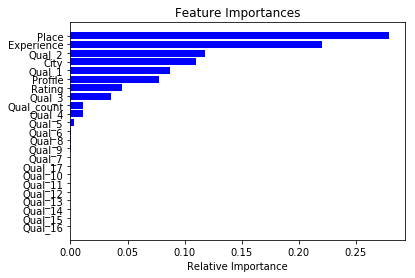

In [44]:
plotFeatureImportances(randomForestModel)

In [45]:
def generateFinalPredictionFile(model):
    y_test_pred = model.predict(test)
    print(y_test_pred)
    pd.DataFrame(y_test_pred, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)

In [46]:
test=test.drop(['Fees'], axis=1)
generateFinalPredictionFile(randomForestModel)

[262.   271.   515.   ... 260.   173.75 490.  ]
